In [19]:
%run "C:\Users\amayaa\OneDrive - John Keells Holdings PLC\Desktop\sampleuc\src\common\utils\runscipt.ipynb"

In [21]:
%run "C:\Users\amayaa\OneDrive - John Keells Holdings PLC\Desktop\sampleuc\src\model\run_scripts.ipynb"

In [23]:
%run "C:\Users\amayaa\OneDrive - John Keells Holdings PLC\Desktop\sampleuc\analysis\0.1_checking_missing_values.ipynb"

+-------------+-----------+----------+---------+----------+
|stg_outlet_cd|stg_item_cd|   DATE_ID|sales_qty|      week|
+-------------+-----------+----------+---------+----------+
|            B|       6163|2022-01-27|     12.0|2022-01-21|
|            C|     107836|2022-01-25|      5.0|2022-01-21|
|            B|     118429|2022-01-22|      1.0|2022-01-21|
|            B|     101635|2022-01-26|      5.0|2022-01-21|
|            C|       8800|2022-01-25|     14.0|2022-01-21|
|            A|        898|2022-01-25|      3.0|2022-01-21|
|            A|      13948|2022-01-26|      3.0|2022-01-21|
|            C|       3679|2022-01-22|      7.0|2022-01-21|
|            A|      11509|2022-01-25|      9.0|2022-01-21|
|            C|        898|2022-01-26|    144.0|2022-01-21|
|            C|       8800|2022-01-27|     17.0|2022-01-21|
|            C|     122767|2022-01-25|      1.0|2022-01-21|
|            A|     115846|2022-01-23|     10.0|2022-01-21|
|            C|      10852|2022-01-22|  

In [24]:
conf=get_conf()
logger = set_logging_conf(conf)
transaction_df=get_transaction_info(conf) #getting trasaction table from conf
item_df=get_item_info(conf) #getting item table from conf
store_df=get_store_info(conf) #getting store table from conf
preprocess_transaction_df=preprocess_transaction(conf,transaction_df) 
preprocess_store_info_df=preprocess_store_info(store_df)
preprocess_item_info_df=preprocess_item_info(conf,item_df)
top_5_categories=top_5_categories(preprocess_transaction_df, preprocess_item_info_df)


In [25]:
top_5_categories.show()

+----------------------+--------------------------+------------------+
|stg_item_dept_desc_txt|stg_item_category_desc_txt|   total_sales_qty|
+----------------------+--------------------------+------------------+
|             Beverages|       Ambient Liquid Milk|           55708.0|
|             Beverages|             Powdered Milk|           24177.0|
|             Beverages|      Single Consumptio...|           23174.0|
|             Beverages|      Multiple Consumpt...|            9682.0|
|             Beverages|          Non Flavored Tea|            4208.0|
|               Chilled|                Fat Spread|           10671.0|
|               Chilled|                      Curd|            5248.0|
|               Chilled|                    Butter|            3092.0|
|               Chilled|            Whipping Cream|            2025.0|
|               Chilled|             Cheese Slices|             696.0|
|               Grocery|      Ambient Instant N...|           62770.0|
|     

In [26]:
top_5_categories_stats=get_stats(preprocess_store_info_df)


In [32]:
top_5_categories_stats.show()

+-------+-------------+----------------------+---------------------------+-----------------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+----------------------+
|summary|stg_outlet_cd|stg_outlet_area_ft_val|stg_outlet_parking_lots_num|stg_population_within_1km_val|stg_population_within_2km_val|stg_population_within_3km_val|stg_no_of_compet_supermarket_val|stg_outlet_profile_cat|stg_outlet_cluster_cat|
+-------+-------------+----------------------+---------------------------+-----------------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+----------------------+
|  count|            3|                     3|                          3|                            3|                            3|                            3|                               3|                     3|                     3|
|   mean|         NULL| 

In [38]:
# Aggregate total sales by department
dept_sales_df = top_5_categories.groupBy("stg_item_dept_desc_txt").agg(f.sum("total_sales_qty").alias("total_sales"))
dept_sales_df.show()

+----------------------+------------------+
|stg_item_dept_desc_txt|       total_sales|
+----------------------+------------------+
|             Beverages|          116949.0|
|               Chilled|           21732.0|
|               Grocery|137351.42201520503|
+----------------------+------------------+



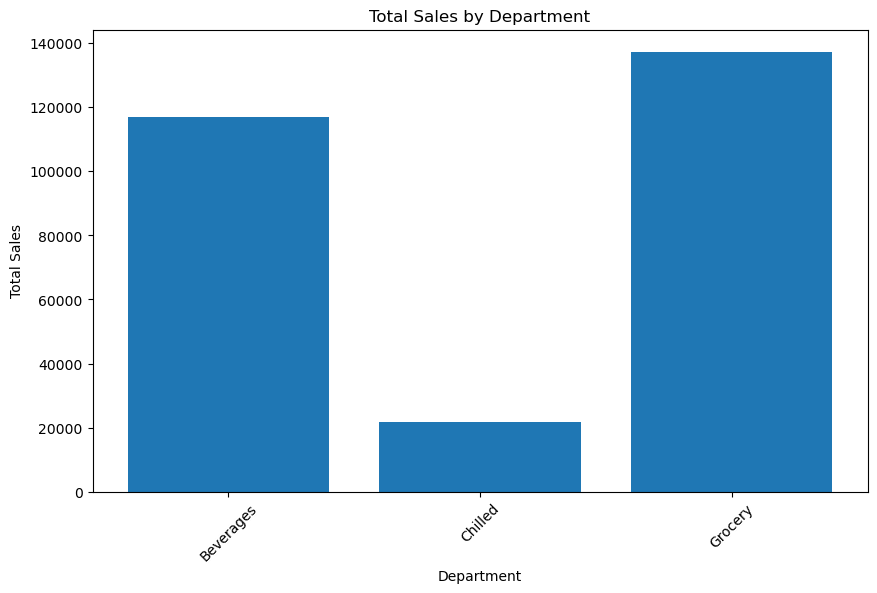

In [40]:
# Convert to Pandas DataFrame for plotting
dept_sales_pd = dept_sales_df.toPandas()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(dept_sales_pd["stg_item_dept_desc_txt"], dept_sales_pd["total_sales"])
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.title('Total Sales by Department')
plt.xticks(rotation=45)
plt.show()